In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno as mno


In [2]:
# Suppress warnings and set display options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
%matplotlib inline




In [4]:
# Define missing values
miss_values = ['-7.00 ~ +7.00', '#VALUE!-#VALUE!mm', '#VALUE!-#VALUE!', '1999-10-01 00:00:00']

# Load the dataset
df = pd.read_excel('datasets/Lunettes.xlsx', index_col=0, na_values=miss_values)



In [5]:
# Display the first few rows of the dataset
df.head()



,Type,Marque,Nom,Prix,Sexe,Couleur,Style,Matériau_de_la_monture,Matériaux_des_verres,Plage_ep,Convient_aux_verres_progressifs,Image_URL-src
0,https://www.easylunettes.fr/lunettes-de-soleil...,Ray Ban Kids,Ray-Ban Kids RJ9647S 288/13,81€,Enfant,Transparent Light Brown,Aviator,Métal,Plastique,55-79,Oui,https://image4.cdnsbg.com/1/278/579299_1638322...
1,https://www.easylunettes.fr/lunettes-de-soleil...,Chloe,Chloe CH0081S 002,230€,Femmes,Transparent Brown,Papillon,Acetate,CR39,61-85,Oui,https://image4.cdnsbg.com/1/241/572895_1643151...
2,https://www.easylunettes.fr/lunettes-de-soleil...,Giorgio Armani,Giorgio Armani AR6060 30016G,219€,Hommes,Noir Mat,Aviateur,Métal,Plastique,61-85,Oui,https://image4.cdnsbg.com/1/37/510317_15994951...
3,https://www.easylunettes.fr/lunettes-de-soleil...,Vogue Eyewear,Vogue Eyewear VO5440S 300071,99€,Femmes,Vert Foncé,Rectangulaire,Plastique,Plastique,57-81,Oui,https://image4.cdnsbg.com/1/59/602454_16522262...
4,https://www.easylunettes.fr/lunettes-de-soleil...,Gucci,Gucci GG0448S 004,390€,Hommes,La Havane,Aviateur,Acetate,Nylon,62-86,Oui,https://image4.cdnsbg.com/1/10/511654_16424756...


<Axes: >

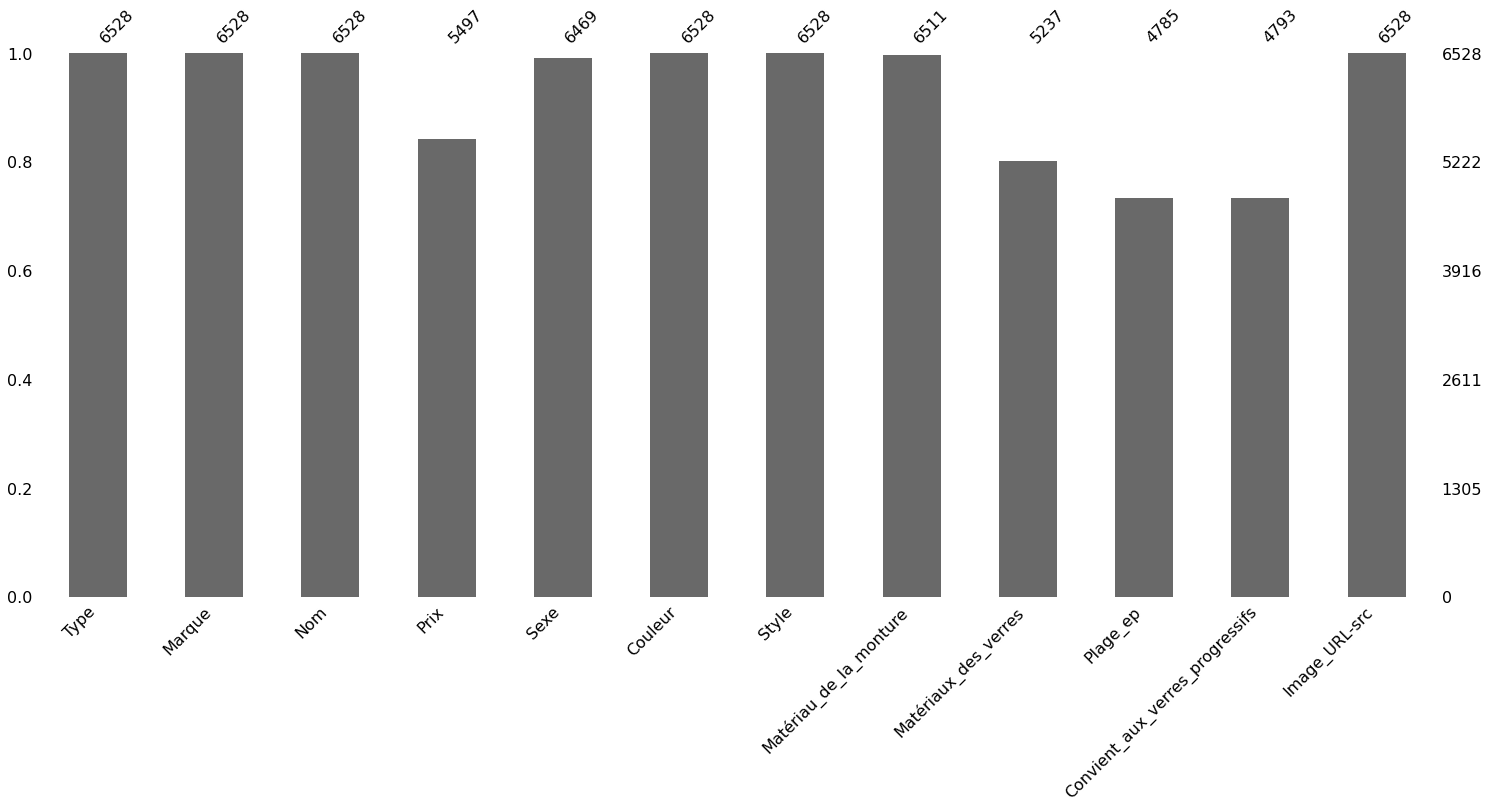

In [6]:
# Visualize missing data
mno.bar(df)



In [7]:
# Display information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6528 entries, 0 to 6527
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Type                             6528 non-null   object
 1   Marque                           6528 non-null   object
 2   Nom                              6528 non-null   object
 3   Prix                             5497 non-null   object
 4   Sexe                             6469 non-null   object
 5   Couleur                          6528 non-null   object
 6   Style                            6528 non-null   object
 7   Matériau_de_la_monture           6511 non-null   object
 8   Matériaux_des_verres             5237 non-null   object
 9   Plage_ep                         4785 non-null   object
 10  Convient_aux_verres_progressifs  4793 non-null   object
 11  Image_URL-src                    6528 non-null   object
dtypes: object(12)
memory usage: 663.0+

In [8]:

# Display data types of the dataset
df.dtypes

# Data Cleaning:
## Remove duplicates and reset the index
df = df.drop_duplicates().reset_index(drop=True)



In [9]:
# Display the shape and data types of the dataset
print(df.shape)
print(df.dtypes.value_counts())



(4854, 12)
object    12
dtype: int64


In [10]:
# Display updated information about the dataset
df.info()

# Display the columns and their null values count
df.columns
df.isnull().sum()

# Display unique values for each column
for i in df.columns:
    print(i, " : ", df[i].unique(), "\n            ***********************\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Type                             4854 non-null   object
 1   Marque                           4854 non-null   object
 2   Nom                              4854 non-null   object
 3   Prix                             4142 non-null   object
 4   Sexe                             4795 non-null   object
 5   Couleur                          4854 non-null   object
 6   Style                            4854 non-null   object
 7   Matériau_de_la_monture           4842 non-null   object
 8   Matériaux_des_verres             4044 non-null   object
 9   Plage_ep                         3596 non-null   object
 10  Convient_aux_verres_progressifs  3603 non-null   object
 11  Image_URL-src                    4854 non-null   object
dtypes: object(12)
memory usage: 455.2+

In [11]:
# Convert 'Prix' column from string to float
df['Prix'] = df['Prix'].str.replace('€', '').str.replace(',', '.')
df['Prix'] = df['Prix'].astype(float)
df['Prix'].dtype

# Calculate the 70th percentile of the 'Prix' column
maxx = df['Prix'].quantile(0.70)
maxx




180.0

In [12]:
# Display summary statistics
df.describe()



,Prix
count,4142.000000
mean,151.631816
std,78.677301
min,26.000000
25%,90.000000
50%,135.000000
75%,198.000000
max,990.000000


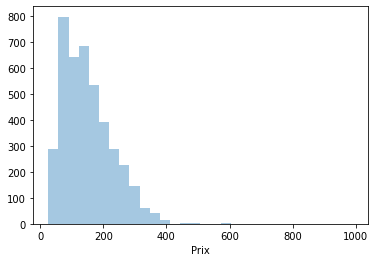

In [13]:
# Plot distribution of 'Prix'
sns.distplot(df['Prix'], kde=False, bins=30)
plt.show()




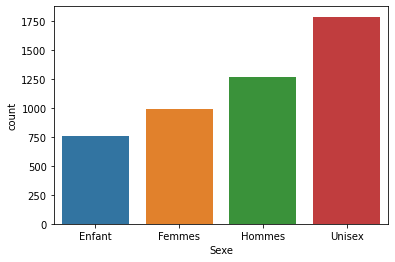

In [14]:
# Plot count of 'Sexe'
sns.countplot(x='Sexe', data=df)
plt.show()



In [15]:
# Display null values count again
df.isna().sum()



Type                                  0
Marque                                0
Nom                                   0
Prix                                712
Sexe                                 59
Couleur                               0
Style                                 0
Matériau_de_la_monture               12
Matériaux_des_verres                810
Plage_ep                           1258
Convient_aux_verres_progressifs    1251
Image_URL-src                         0
dtype: int64

In [16]:
# Clean 'Plage_ep' column and convert to float
df['Plage_ep'] = df['Plage_ep'].str.replace('-', '')
df['Plage_ep'] = df['Plage_ep'].astype(float)
df['Plage_ep'].dtype



dtype('float64')

In [17]:
# Additional cleaning on 'Plage_ep' column
a = round(df['Plage_ep'] / 100, 0) - 1
b = df['Plage_ep'] % 100
df['Plage_ep'] = (a + b) / 2
df['Plage_ep']



0       67.0
1       73.0
2       73.0
3       69.0
4       74.0
        ... 
4849    64.0
4850     NaN
4851    61.0
4852    64.0
4853    66.0
Name: Plage_ep, Length: 4854, dtype: float64

In [18]:
# Convert 'Sexe' column to numerical values
df['Sexe'] = df['Sexe'].replace({'Unisex': 0, 'Enfant': 1, 'Femmes': 2, 'Hommes': 3})



In [19]:
# Display cleaned dataset
df

,Type,Marque,Nom,Prix,Sexe,Couleur,Style,Matériau_de_la_monture,Matériaux_des_verres,Plage_ep,Convient_aux_verres_progressifs,Image_URL-src
0,https://www.easylunettes.fr/lunettes-de-soleil...,Ray Ban Kids,Ray-Ban Kids RJ9647S 288/13,81.0,1.0,Transparent Light Brown,Aviator,Métal,Plastique,67.0,Oui,https://image4.cdnsbg.com/1/278/579299_1638322...
1,https://www.easylunettes.fr/lunettes-de-soleil...,Chloe,Chloe CH0081S 002,230.0,2.0,Transparent Brown,Papillon,Acetate,CR39,73.0,Oui,https://image4.cdnsbg.com/1/241/572895_1643151...
2,https://www.easylunettes.fr/lunettes-de-soleil...,Giorgio Armani,Giorgio Armani AR6060 30016G,219.0,3.0,Noir Mat,Aviateur,Métal,Plastique,73.0,Oui,https://image4.cdnsbg.com/1/37/510317_15994951...
3,https://www.easylunettes.fr/lunettes-de-soleil...,Vogue Eyewear,Vogue Eyewear VO5440S 300071,99.0,2.0,Vert Foncé,Rectangulaire,Plastique,Plastique,69.0,Oui,https://image4.cdnsbg.com/1/59/602454_16522262...
4,https://www.easylunettes.fr/lunettes-de-soleil...,Gucci,Gucci GG0448S 004,390.0,3.0,La Havane,Aviateur,Acetate,Nylon,74.0,Oui,https://image4.cdnsbg.com/1/10/511654_16424756...
...,...,...,...,...,...,...,...,...,...,...,...,...
4849,https://www.easylunettes.fr/lunettes-de-vue-de...,Ray Ban Kids,Ray-Ban Kids RY1531 3701,102.0,1.0,Top Havana On Havana Blue,Wayfarer,Plastique,Personnalisable,64.0,Oui,https://image4.cdnsbg.com/2/278/333755_1599526...
4850,https://www.easylunettes.fr/lunettes-de-vue-de...,SmartBuy Kids,SmartBuy Kids Amory PK8E,50.0,1.0,Noir,Carrée,Plastique,Personnalisable,NaN,NaN,https://image4.cdnsbg.com/2/623/403576_1599537...
4851,https://www.easylunettes.fr/lunettes-de-vue-de...,SmartBuy Kids,SmartBuy Kids Dhesza MK1-46E,64.0,1.0,Violet,Aviateur,Métal,Personnalisable,61.0,Non,https://image4.cdnsbg.com/2/623/446080_1629342...
4852,https://www.easylunettes.fr/lunettes-de-vue-de...,Seventh Street,Seventh Street S292 Kids GEG,105.0,1.0,Bleu,Carrée,Acetate,Personnalisable,64.0,Oui,https://image4.cdnsbg.com/2/56/410253_15995192...
